# Seaborn lmplot 

lmplot is a function in the seaborn library that allows you to create a scatter plot with a linear regression model fit. It can also facet the plot by one or more categorical variables, creating a grid of subplots with different subsets of the data. 

In [97]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [98]:
df = sns.load_dataset('penguins').dropna()

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [99]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [100]:
df_new = df.drop(['species', 'island', 'sex'], axis=1)
df_new.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [101]:
df_new.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


<Axes: >

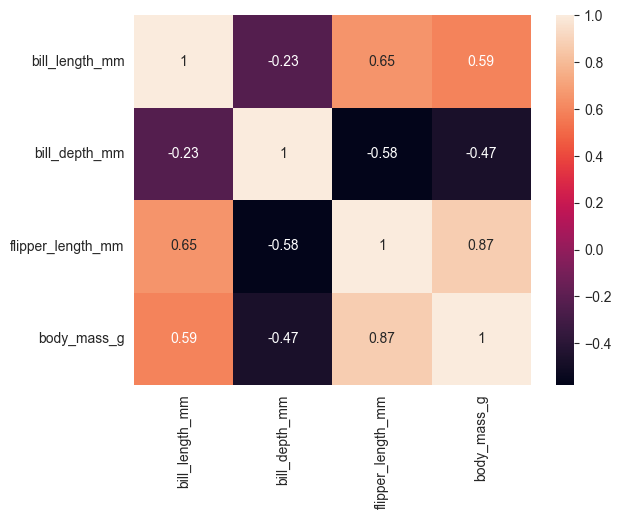

In [102]:
sns.heatmap(df_new.corr(), annot=True)

## Basics 

In [103]:
sns.set_style('white')

In [104]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


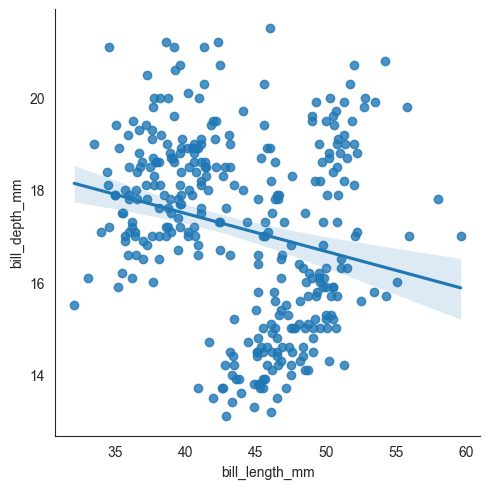

In [105]:
sns.lmplot(df, x = 'bill_length_mm', y = "bill_depth_mm")

### Adding Hue 

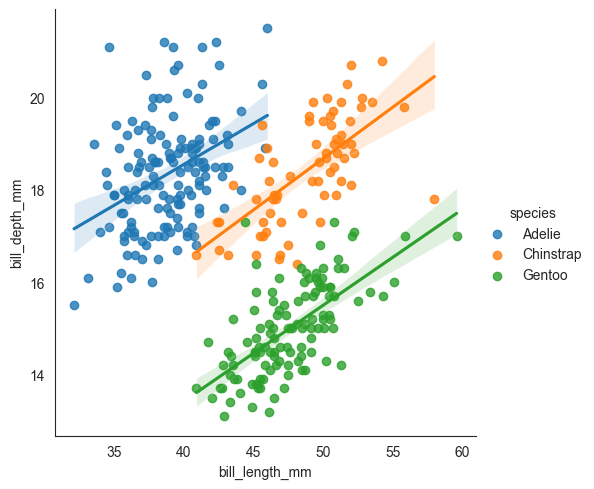

In [106]:
sns.lmplot(df, x = 'bill_length_mm', y = "bill_depth_mm", hue='species')

### Markers

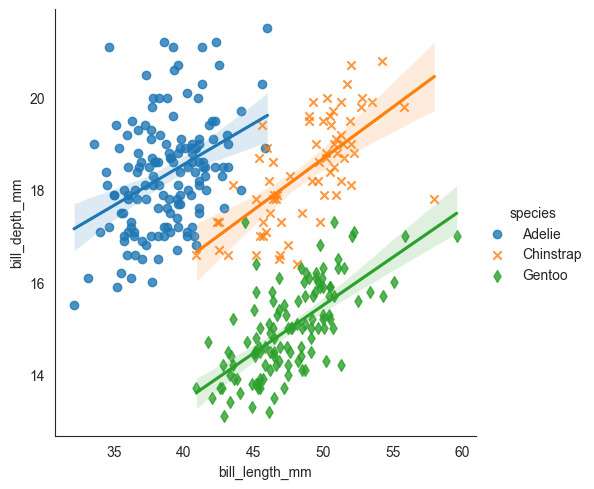

In [107]:
sns.lmplot(df, x = 'bill_length_mm', y = "bill_depth_mm", 
           hue='species',
           markers=['o', 'x', 'd'])

## Small Multiples (FacetGrid)

### `col`

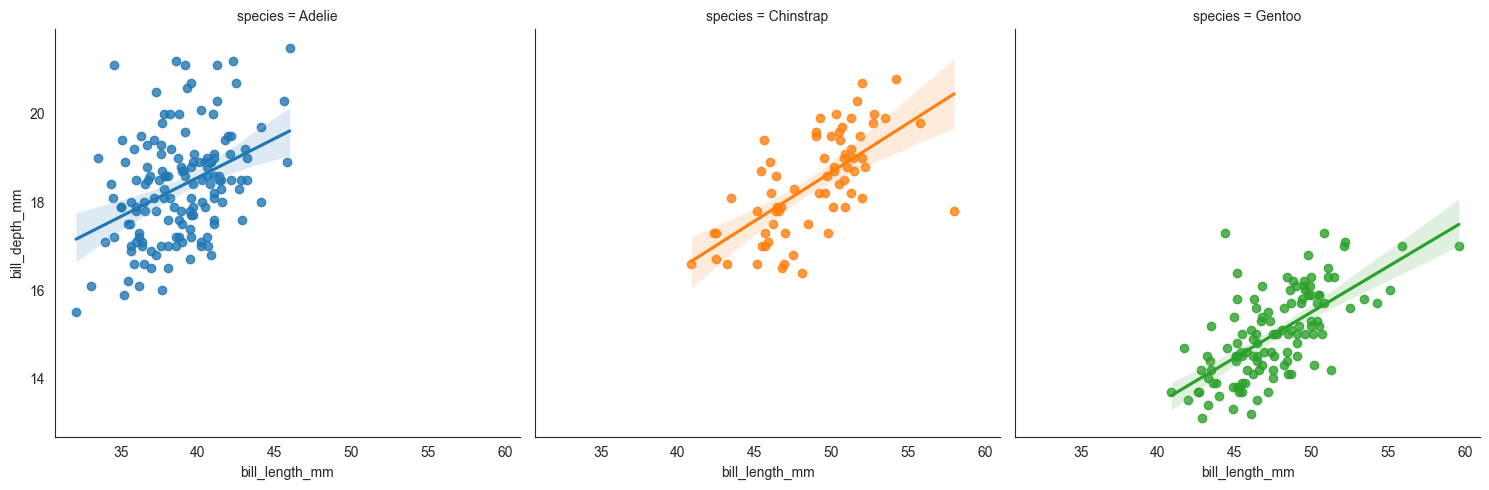

In [108]:
sns.lmplot(df, x = 'bill_length_mm', y = "bill_depth_mm", 
           hue='species',
           col='species')

## `row`

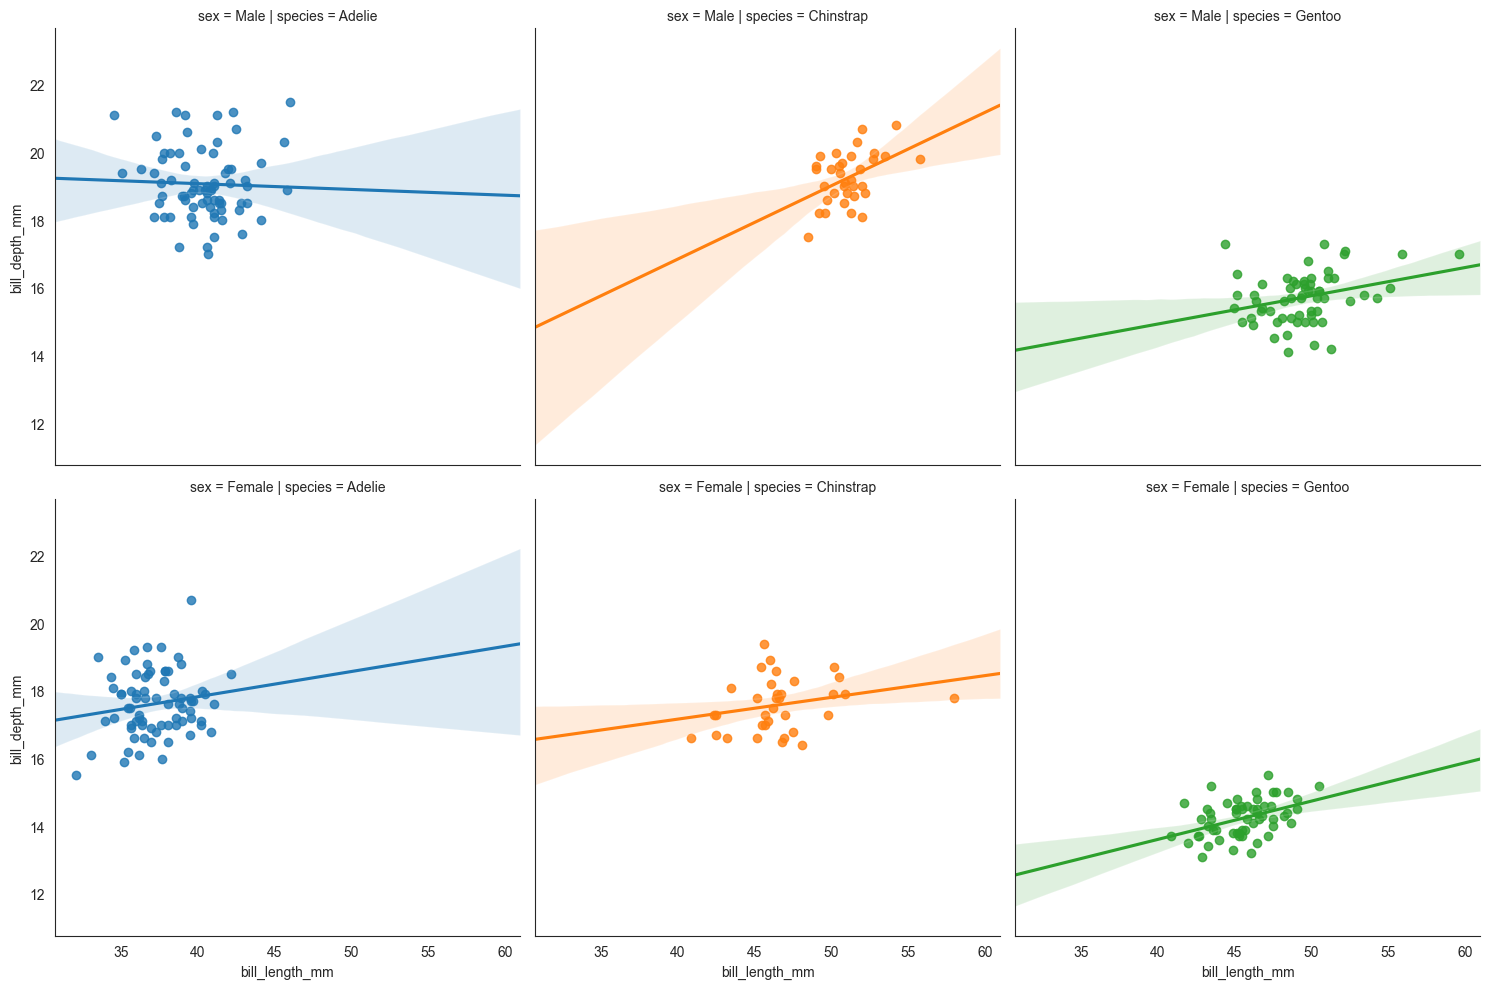

In [109]:
sns.lmplot(df, x = 'bill_length_mm', y = "bill_depth_mm", 
           hue='species',
           col='species',
           row='sex',
           truncate=False)

## Extras

### `x_bins`

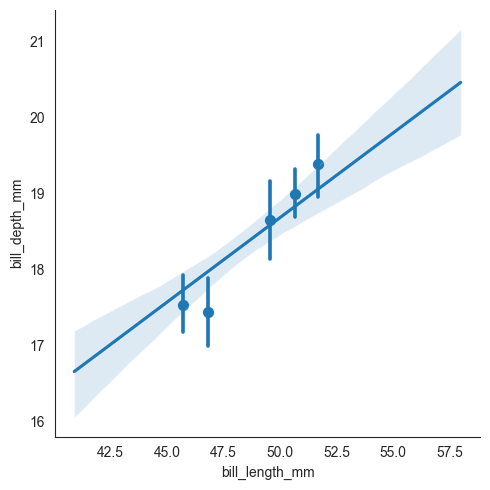

In [110]:
sns.lmplot(df[df.species=='Chinstrap'], x = 'bill_length_mm', y = "bill_depth_mm", 
           x_bins=5)

#### `Next Method`

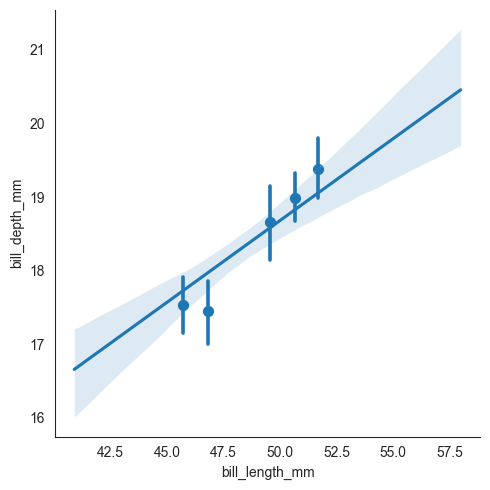

In [111]:
sns.lmplot(df[df['species']=='Chinstrap'], 
           x = 'bill_length_mm', y = "bill_depth_mm", 
           x_bins=5)

### Other models: Logistic Regression, `logistic`

In [112]:
## Creating Binary for Logistics 
df['sex_binary'] = [(x == 'Male') for x in df.sex] 
# checks whether sex is male and keep True if it is
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_binary
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,False
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,False
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,False
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,True


In [113]:
#Need Statsmodels
import statsmodels
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
sns.lmplot(df, x = 'body_mass_g', y = 'sex_binary', logistic=True, n_boot=100)

ModuleNotFoundError: No module named 'statsmodels'

## Styling 

### `scatter_kws`

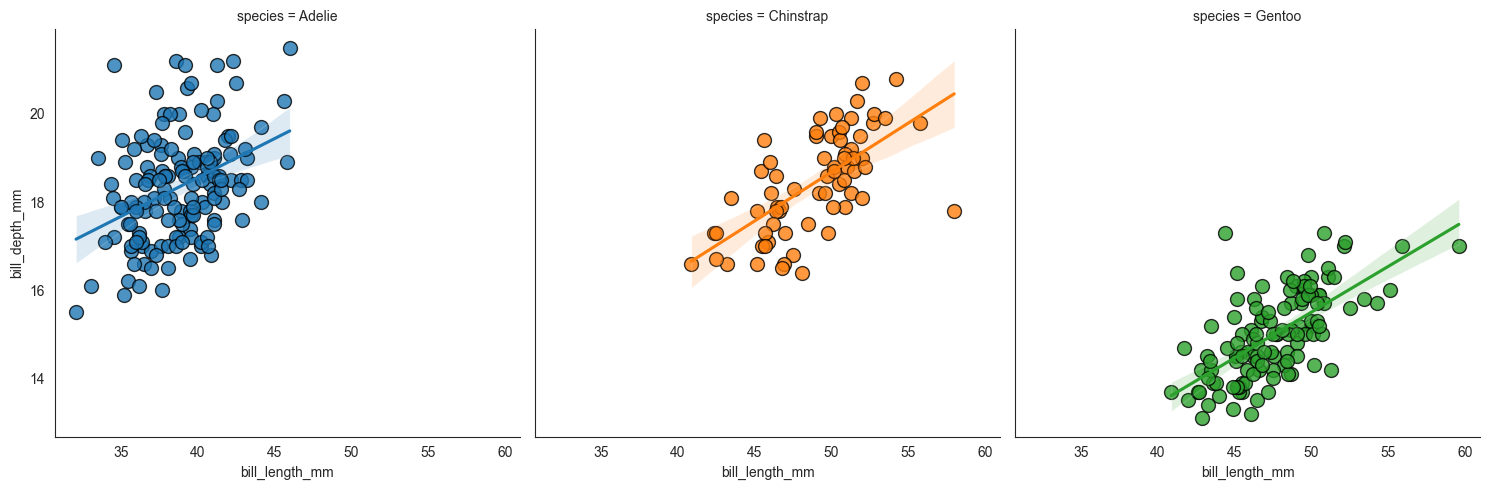

In [115]:
sns.lmplot(df, x = 'bill_length_mm', y = "bill_depth_mm", 
           hue='species',
           col='species',
           scatter_kws={'s':100, 'edgecolor':'black'})

#### `line_kws`

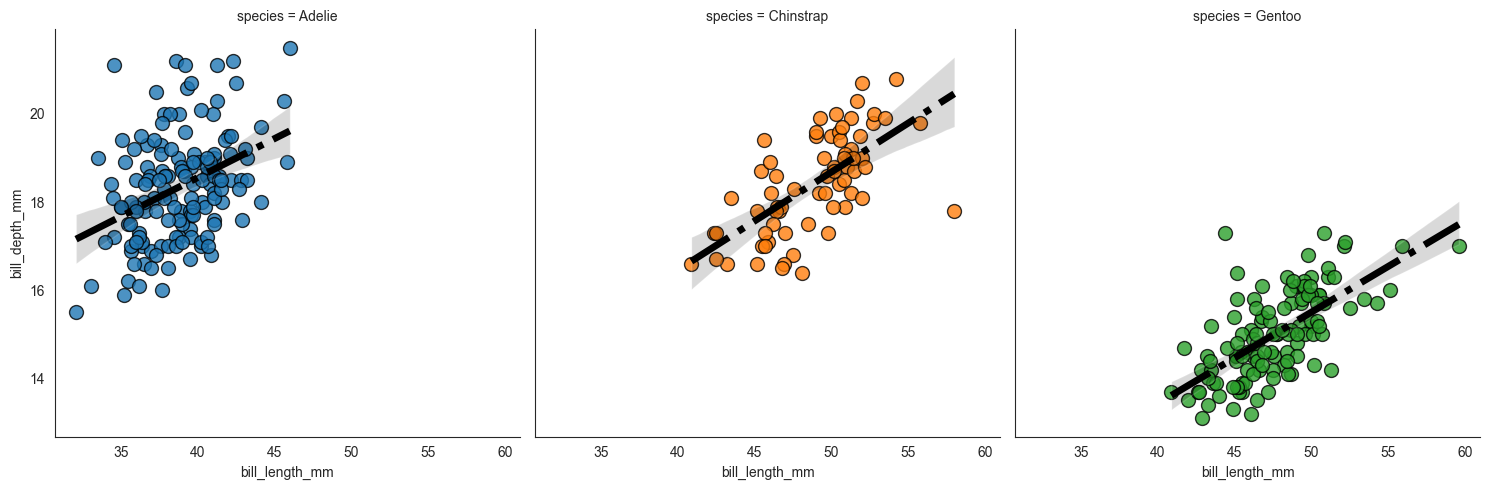

In [117]:
sns.lmplot(df, x = 'bill_length_mm', y = "bill_depth_mm", 
           hue='species',
           col='species',
           scatter_kws={'s':100, 'edgecolor':'black'},
           line_kws={'lw':5, 'ls':'-.', 'color':'black'}) #ls = line style

## Examples, Thumbnail

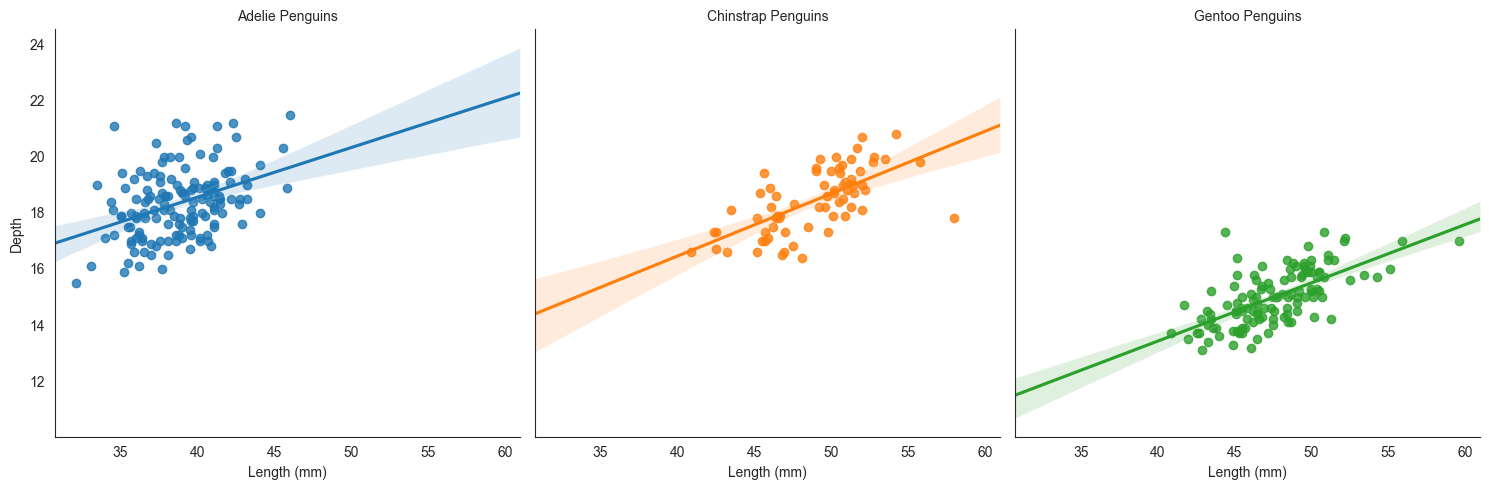

In [118]:
g = sns.lmplot(df, x = 'bill_length_mm', y = "bill_depth_mm", 
           hue='species',
           col='species',
           truncate=False)

g.set_titles("{col_name} Penguins")
g.set_xlabels("Length (mm)")
g.set_ylabels("Depth")
plt.tight_layout()